# Full Data Analysis of Heart Disease Prediction



### PART 1 and 2: Importing and Cleaning Up Data


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.common import random_state
from scipy import stats
from sklearn.model_selection import train_test_split


* Import the necessary libraries: pandas for data manipulation,seaborn and matplotlib for graphical analysis


In [32]:
df=pd.read_csv('heart.csv')
df.head()
df.info()
print(df.describe())
df.duplicated()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB
              Age         Sex      RestBP        Chol         Fbs     RestECG  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

* Displayed data using head, info,describe,duplicaated functions.<br>
* As we can see from the data, there are no duplicates, but there is two rows with missing Thal cells.<br>
* Since the two rows make up less than one percent of data, deleting entire rows will be inconsequential, so its faster and easier to delete the missing rows.
* We can also identify extreme outliers in Chol(565 mg/L vs 242 mg/L 50th prcentile), and Rest Bp (200 vs 130 50th percentile)

* Clean up data and remove incomplete information

In [33]:
df=df.dropna()

In [34]:
chol_99th=df['Chol'].quantile(0.99)
df['Chol'] = np.where(df['Chol'] > chol_99th, chol_99th, df['Chol'])
bp_99th = df['RestBP'].quantile(0.99)
df['RestBP'] = np.where(df['RestBP'] > bp_99th, bp_99th, df['RestBP'])
oldpeak_99th = df['Oldpeak'].quantile(0.99)
print(f"Oldpeak 99th percentile: {oldpeak_99th}. Capping values above this.")
df['Oldpeak'] = np.where(df['Oldpeak'] > oldpeak_99th, oldpeak_99th, df['Oldpeak'])

Oldpeak 99th percentile: 4.2. Capping values above this.


### PART 3 Exploratory Data Analysis (EDA)


#### 1.Checking  the distribution of 'age', 'cholesterol', and 'restbps' (resting blood pressure) using Univariate Analysis.<BR>


Text(0.5, 0, 'Age')

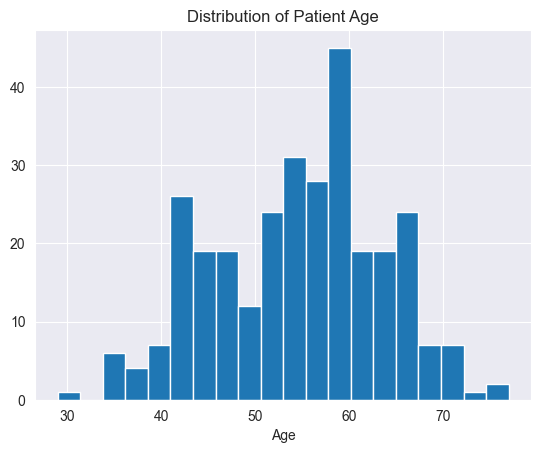

In [35]:
plt.hist(df['Age'],bins=20)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')

* used a histogram to display information about the age of the patients, as we can see the median age is 57.5-60

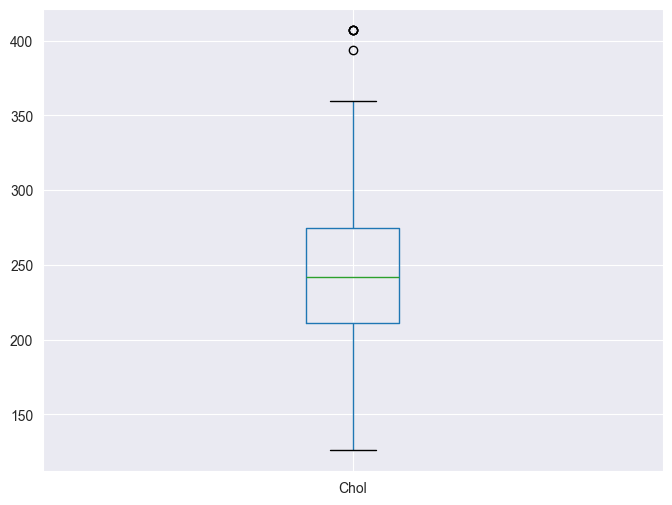

In [36]:
df.boxplot(column='Chol',figsize=(8,6))
plt.show()

* Used a boxplot to show data about cholesterol, as we can see the mean cholesterol level is around 250 mg/dL

### Male vs Female

<Axes: xlabel='Sex'>

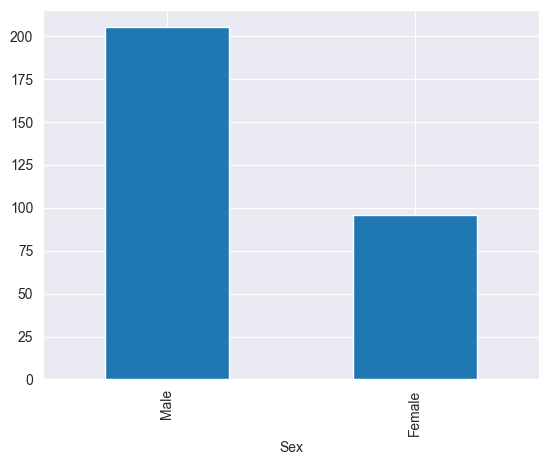

In [37]:
sex_labels = df['Sex'].map({0: 'Female', 1: 'Male'})
sex_counts=sex_labels.value_counts()
sex_counts.plot(kind='bar')

* We can see that from the 302 people sample, there is 200 male participants vs about 100 female participants, a considerable difference between numbers of males and females.

### Heart Disease vs No Heart Disease

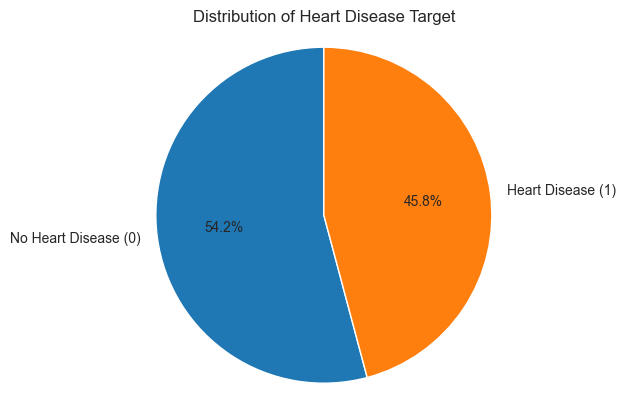

In [38]:
target_counts = df['Target'].value_counts()
target_labels = target_counts.index.map({0: 'No Heart Disease (0)', 1: 'Heart Disease (1)'})
plt.pie(
    target_counts,
    labels=target_labels,
    autopct='%1.1f%%',
    startangle=90,)
plt.title('Distribution of Heart Disease Target')
plt.axis('equal')
plt.show()

* We can see a moderate imbalance in the class balance of the targets(54.2% vs 45.8% from pie chart)

Text(0.5, 0, 'RestBP')

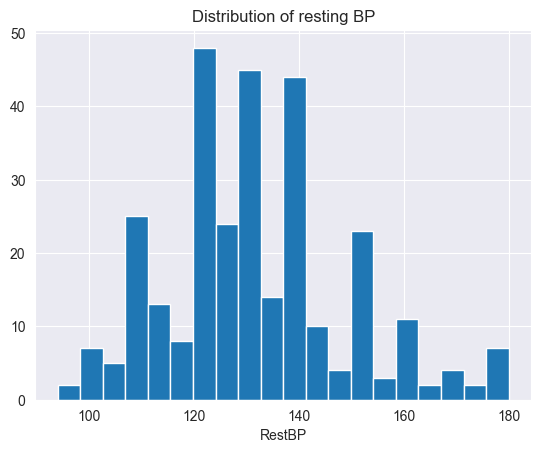

In [39]:
plt.hist(df['RestBP'],bins=20)
plt.title('Distribution of resting BP')
plt.xlabel('RestBP')

### Bivariate Analysis:

#### Age vs Cholestrol Correlation:

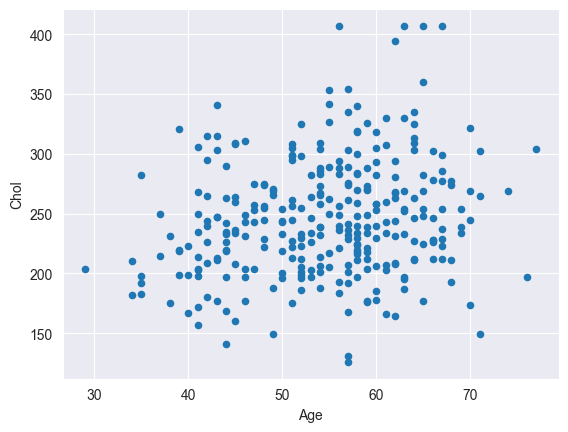

In [40]:
df.plot.scatter(x='Age',y='Chol')

plt.show()

* We can see that cholestrol level and age are not highly correlative and along the ages cholestrol level doesbt change much.
* We can identify an outlier at (67,565) but that is insignificant for our analysis.

#### Male vs Female resting Bp:

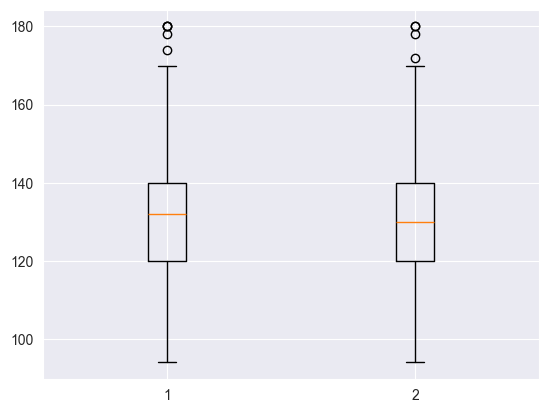

In [41]:
female_bp = df[sex_labels == 'Female']['RestBP']
male_bp = df[sex_labels == 'Male']['RestBP']
plt.boxplot([female_bp, male_bp])
plt.show()
numeric_cols = df.select_dtypes(include=np.number).columns


* The resting heart rate of males and females are similar and we can see  slightly higher median for males (130 vs 135) and a higher range.
* We can see that maximum and minumum for males and females is similar.
* We can see an extreme outlier for male at 200 and 3 others at Bp higher than maximum range and als Extreme outlier at 193 for Females and 3 others above the maximum range

### Correlation Matrix:

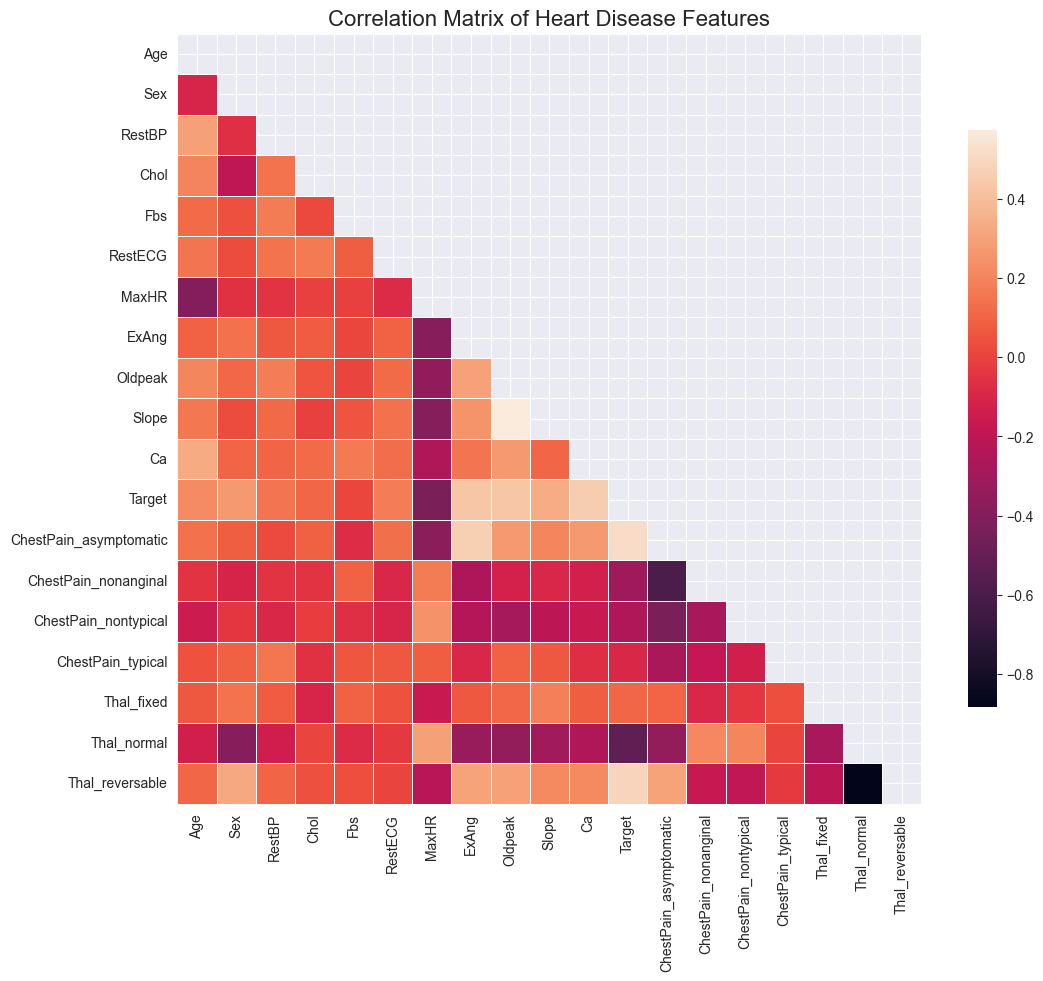

In [42]:
df['ChestPain'].unique()
df['ChestPain'].unique()
df_encoded = pd.get_dummies(df, columns=['ChestPain', 'Thal'])
co_mtx = df_encoded.corr(numeric_only=True)
mask = np.triu(np.ones_like(co_mtx, dtype=bool))
plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix of Heart Disease Features', fontsize=16)
sns.heatmap(co_mtx,mask=mask,fmt='.2f',linewidths=.5,annot_kws={"size": 10},
    cbar_kws={"shrink": .75})
plt.show()

* we used the sns library to make a heatmap that shows the correlation between the features,we masked the correlation matrix so the correlation dont get repeated, we see higher correlation between the features with darker cells with them.

## Part 4: Summary of Our Findings

* We can see from the heatmap that Excercise induced angina and ST depression have the highest correlation with heart disease
* We can see that number of major Vessels is positively correlated with disease
* Maximum HR is negatively associated with heart disease
* Chest pain type is associative, among people with disease more 3/4th report asymptomatic chest pain while only 5 percent report 'typical' chest pain.

* From our analysis, I hypothise that depression(OldPeak) and number of major vessels (Ca) are the most important feature for determining heart disease, since they  have the highest associations with disease.

## Model Building and Evaluation:

### Encoding:

* To be able to use data in models ,we need to make our data numerical and avoid text
* We will be Testing two methods of encoding, One-Hot encoding,which converts data into a binary format,
* Label encoding, which converts every category into a unique integer

#### One_Hot encoding:


In [43]:
columns_to_encode = ['ChestPain', 'Thal', 'RestECG', 'Slope']
df_one_hot=pd.get_dummies(df,columns=columns_to_encode,drop_first=True)

* To implement encoding, we first define the columns to be encoded in a list for readability
* We use the get_dummies method to implement the encoding.
* I predict that One-hot encoding will be highly effcetive becuase conversion to binary makes data easily understood by algrothims, which increases performance.
* The data looks like the following

In [44]:
print(df_one_hot)
df_one_hot.info()

     Age  Sex  RestBP   Chol  Fbs  MaxHR  ExAng  Oldpeak  Ca  Target  \
0     63    1   145.0  233.0    1    150      0      2.3   0       0   
1     67    1   160.0  286.0    0    108      1      1.5   3       1   
2     67    1   120.0  229.0    0    129      1      2.6   2       1   
3     37    1   130.0  250.0    0    187      0      3.5   0       0   
4     41    0   130.0  204.0    0    172      0      1.4   0       0   
..   ...  ...     ...    ...  ...    ...    ...      ...  ..     ...   
298   45    1   110.0  264.0    0    132      0      1.2   0       1   
299   68    1   144.0  193.0    1    141      0      3.4   2       1   
300   57    1   130.0  131.0    0    115      1      1.2   1       1   
301   57    0   130.0  236.0    0    174      0      0.0   1       1   
302   38    1   138.0  175.0    0    173      0      0.0   2       0   

     ChestPain_nonanginal  ChestPain_nontypical  ChestPain_typical  \
0                   False                 False               Tru

* as we can see from .info() that the data that was encoded has been turned into boolean, which is 0,1 in binary terms
* and we can see the 0 and 1 values in that data table

#### Label encoding:

In [45]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_label_encoded= df.copy()
le= LabelEncoder()
for col in columns_to_encode:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])

* The second method of encoding is LabelEncoding, which gives a numerical value (1,2,3....) for our categories
* it could be useful for nomical data,particularly smaller data, and we will test it for our data.
* Below is how the data looks after label encoding

In [46]:
print(df_label_encoded)
df_label_encoded.info()

     Age  Sex  ChestPain  RestBP   Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0     63    1          3   145.0  233.0    1        2    150      0      2.3   
1     67    1          0   160.0  286.0    0        2    108      1      1.5   
2     67    1          0   120.0  229.0    0        2    129      1      2.6   
3     37    1          1   130.0  250.0    0        0    187      0      3.5   
4     41    0          2   130.0  204.0    0        2    172      0      1.4   
..   ...  ...        ...     ...    ...  ...      ...    ...    ...      ...   
298   45    1          3   110.0  264.0    0        0    132      0      1.2   
299   68    1          0   144.0  193.0    1        0    141      0      3.4   
300   57    1          0   130.0  131.0    0        0    115      1      1.2   
301   57    0          2   130.0  236.0    0        2    174      0      0.0   
302   38    1          1   138.0  175.0    0        0    173      0      0.0   

     Slope  Ca  Thal  Target  
0       

* We can see that encoded data has been turned into integer type using .info() method
* We can see that in the data table, where category labels are integers

### Ordinal Encoding

In [47]:
df_ord = df.copy()


thal_map = {'normal': 0, 'fixed': 1, 'reversable': 2}
df_ord['Thal'] = df_ord['Thal'].map(thal_map)
cp_map = {'typical': 1, 'nontypical': 2, 'nonanginal': 3, 'asymptomatic': 4}
df_ord['ChestPain'] = df_ord['ChestPain'].map(cp_map)

print("Unique values in Thal after encoding:", df_ord['Thal'].unique())
print("Unique values in ChestPain after encoding:", df_ord['ChestPain'].unique())
print(df_ord[['Thal', 'ChestPain', 'Slope', 'Ca']].head())

Unique values in Thal after encoding: [1 0 2]
Unique values in ChestPain after encoding: [1 4 3 2]
   Thal  ChestPain  Slope  Ca
0     1          1      3   0
1     0          4      2   3
2     2          4      2   2
3     0          3      3   0
4     0          2      1   0


## Training and Testing

### Splitting Data:

* To use the data effectively in our models we, would split the data into training and testing sets.
* The train/test split in our work is 80% train and 20% test.
* We can do that using the train_test_split function.
* We did this step for both of our encoding strategies to compare.
* Below we split the data for one_hot-encoded data

In [48]:
X_one_hot = df_one_hot.drop('Target', axis=1)
y_one_hot = df_one_hot['Target']
X_train_one_hot,X_test_one_hot,y_train_one_hot,y_test_one_hot=train_test_split(X_one_hot,y_one_hot,test_size=0.2,random_state=42,stratify=y_one_hot)


* Same steps for label encoding

In [49]:
X_le = df_label_encoded.drop('Target', axis=1)
y_le = df_label_encoded['Target']

X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(
    X_le, y_le, test_size=0.2, random_state=42, stratify=y_le
)

* Finaly we normalize our data using StandardScaler to transform our data to have  a mean value 0 and standard deviation 1 and avoid issues caused by using different scales and ensure faster Training
* We implement it for both of our encoding strategies

In [50]:
scaler_one_hot=StandardScaler()
X_train_one_hot_s=scaler_one_hot.fit_transform(X_train_one_hot)
X_test_one_hot_s= scaler_one_hot.transform(X_test_one_hot)
scaler_le = StandardScaler()
X_train_le_scaled = scaler_le.fit_transform(X_train_le)
X_test_le_scaled = scaler_le.transform(X_test_le)

In [51]:
X = df_ord.drop('Target', axis=1)
y = df_ord['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

* We also put the scaled data into dataframes for usage in SVM and LR

In [52]:
X_train_oh_scaled_df = pd.DataFrame(X_train_one_hot_s,columns=X_train_one_hot.columns)
X_test_oh_scaled_df = pd.DataFrame(X_test_one_hot_s, columns=X_test_one_hot.columns)
X_train_le_scaled_df = pd.DataFrame(X_train_le_scaled, columns=X_train_le.columns)
X_test_le_scaled_df = pd.DataFrame(X_test_le_scaled, columns=X_test_le.columns)
x_train_ord_scaled_df=pd.DataFrame(X_train_scaled,columns=X_train.columns)
x_test_ord_scaled_df=pd.DataFrame(X_test_scaled,columns=X_test.columns)

### Model Training

* to train our models, we will import them from sklearn and also import them metrics needed for our model evaluation

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    confusion_matrix
)

* Since we are going to  test multiple models and multiple encoding strategies, lets store both our models and strategies in dictionaries, for cleanness of our code and ease of iteration

In [54]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),"KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5)
}
strategies = {
    "One-Hot Encoded": (X_train_oh_scaled_df, X_test_oh_scaled_df, y_train_one_hot, y_test_one_hot),
    "Label Encoded": (X_train_le_scaled_df, X_test_le_scaled_df, y_train_le, y_test_le),"Ordinal Encoding":(x_train_ord_scaled_df, x_test_ord_scaled_df, y_train, y_test)
}
all_results = []

* now lets loop through the models: Train them ,test them, and compare the result!

In [55]:
for strategy_name,(X_train, X_test, y_train, y_test) in strategies.items():
    for model_name,model in models.items():
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]#positive class prediction for ROC-AUC
        accuracy=accuracy_score(y_test,y_pred)
        roc_auc=roc_auc_score(y_test,y_pred_proba)
        cm=confusion_matrix(y_test,y_pred)
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        report=class_1_metrics = report_dict.get('1', {})
        results_dict = {
            "Encoding": strategy_name,
            "Model": model_name,
            "Accuracy": accuracy,
            "ROC-AUC": roc_auc,
            "Recall (1)": class_1_metrics.get('recall'),
            "Precision (1)": class_1_metrics.get('precision'),
            "F1-Score (1)": class_1_metrics.get('f1-score')
        }
        all_results.append(results_dict)
results_df = pd.DataFrame(all_results)
results_df_sorted = results_df.sort_values(by="ROC-AUC", ascending=False)

print(results_df_sorted.to_markdown(index=False, numalign="left", stralign="left"))


| Encoding         | Model                | Accuracy   | ROC-AUC   | Recall (1)   | Precision (1)   | F1-Score (1)   |
|:-----------------|:---------------------|:-----------|:----------|:-------------|:----------------|:---------------|
| Label Encoded    | Logistic Regression  | 0.868852   | 0.95671   | 0.821429     | 0.884615        | 0.851852       |
| One-Hot Encoded  | Logistic Regression  | 0.885246   | 0.945887  | 0.857143     | 0.888889        | 0.872727       |
| Label Encoded    | SVM                  | 0.885246   | 0.940476  | 0.821429     | 0.92            | 0.867925       |
| Label Encoded    | Random Forest        | 0.852459   | 0.938312  | 0.821429     | 0.851852        | 0.836364       |
| One-Hot Encoded  | Random Forest        | 0.803279   | 0.937771  | 0.821429     | 0.766667        | 0.793103       |
| Label Encoded    | KNeighborsClassifier | 0.885246   | 0.9329    | 0.857143     | 0.888889        | 0.872727       |
| One-Hot Encoded  | SVM                  | 0.83

* As we can observe, the highest accuracy and ROC_AUC scoring model is Logistic Regression with One-hot encoding, followed by random forest
* This result is mainly attributed to the fact that our data is small (301 rows) and our data is fairly monotonic, which makes simpler models like logistic Regression perform better opposing to complex models like Decision data which are liable to generalization
* Furthermore, our cleaning of data, which consisted of removing mising rows and excluding outliers outside the 99th percentile further increased this effect
* As for encoding starategies, we found that both encoding strategies performed similarly accross models, with One_hot encoding edging in most cases
* Overall, we observed that for our data, linear regressor model performed the best, and encoding strategies didnt make a big difference .


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [57]:

lr = LogisticRegression(random_state=42, max_iter=1000)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_lr = GridSearchCV(estimator=lr,
                              param_grid=param_grid_lr,
                              cv=5,
                              scoring='roc_auc',
                              n_jobs=-1)

grid_search_lr.fit(X_train_oh_scaled_df, y_train_one_hot)
print(f"Best parameters for Logistic Regression: {grid_search_lr.best_params_}")
print(f"Best cross-validation ROC-AUC: {grid_search_lr.best_score_:.4f}")

Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}
Best cross-validation ROC-AUC: 0.9007


In [58]:

best_model = grid_search_lr.best_estimator_
y_pred_final = best_model.predict(X_test_oh_scaled_df)
y_proba_final = best_model.predict_proba(X_test_oh_scaled_df)[:, 1]
print(" Final Tuned Model Performance on Test Set")
print(f"Accuracy: {accuracy_score(y_test_one_hot, y_pred_final):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test_one_hot, y_proba_final):.4f}")
print(classification_report(y_test_one_hot, y_pred_final))

 Final Tuned Model Performance on Test Set
Accuracy: 0.8689
ROC-AUC: 0.9426
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.88      0.82      0.85        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



* We Hyper tuned our best model using gridSearch  to test in different splits of data and optimize it with the best parameters.
* After hyper tuning , we found that the best cv ROC-AUC  score we got was 0.9007 with the best parameters, and this tuned model performed with 0.9426 ROC-AUC score on our dataset split
* The lower average after CV is attributed to less biased and more refined testing, as we can see our hyper tuned model performing similarly to our untuned model shows that the random state of the data and the split favoured the model

In [59]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_oh_scaled_df, y_train_one_hot)

print("Original class distribution:\n", y_train_one_hot.value_counts())
print("Resampled class distribution:\n", y_train_smote.value_counts())

xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_oh_scaled_df, y_train_one_hot)

y_pred_xgb = xgb_model.predict(X_test_oh_scaled_df)
y_proba_xgb = xgb_model.predict_proba(X_test_oh_scaled_df)[:, 1]

xgb_smote = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_smote, y_train_smote)

y_pred_xgb_smote = xgb_smote.predict(X_test_oh_scaled_df)
y_proba_xgb_smote = xgb_smote.predict_proba(X_test_oh_scaled_df)[:, 1]

def print_score(model_name, y_test, y_pred, y_proba):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 30)

print_score("Logistic Regression (Tuned)", y_test_one_hot, y_pred_final, y_proba_final)
print_score("XGBoost (Standard)", y_test_one_hot, y_pred_xgb, y_proba_xgb)
print_score("XGBoost (with SMOTE)", y_test_one_hot, y_pred_xgb_smote, y_proba_xgb_smote)

Original class distribution:
 Target
0    130
1    110
Name: count, dtype: int64
Resampled class distribution:
 Target
1    130
0    130
Name: count, dtype: int64
--- Logistic Regression (Tuned) ---
Accuracy: 0.8689
ROC-AUC: 0.9426
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.88      0.82      0.85        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

------------------------------
--- XGBoost (Standard) ---
Accuracy: 0.8197
ROC-AUC: 0.8972
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.77      0.86      0.81        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

-----------------------

In [60]:

X = df_one_hot.drop('Target', axis=1)
y = df_one_hot['Target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(f"Original training counts: {y_train.value_counts().to_dict()}")
print(f"SMOTE training counts:    {y_train_smote.value_counts().to_dict()}")
lr_smote = LogisticRegression(C=0.01, solver='lbfgs', random_state=42, max_iter=1000)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = lr_smote.predict(X_test_scaled)
y_proba_smote = lr_smote.predict_proba(X_test_scaled)[:, 1]
print("\n--- Logistic Regression with SMOTE Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_smote):.4f}")
print("\n" + classification_report(y_test, y_pred_smote))

Original training counts: {0: 130, 1: 110}
SMOTE training counts:    {1: 130, 0: 130}

--- Logistic Regression with SMOTE Performance ---
Accuracy: 0.8525
ROC-AUC:  0.9437

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.83      0.86      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



## Final Summary and Findings:

* Best model: Logistic regression with one-hot encoding and standardization worked the best (about 0.88 accuracy and 0.94 ROC-AUC).
* Key predictors: Heart disease was most linked to exercise-induced angina (ExAng), ST depression (Oldpeak), number of diseased vessels (Ca), lower maximum heart rate (MaxHR), and chest pain type.
* Model comparison: Logistic regression was a bit better and more consistent than random forest and SVM, and clearly better than a single decision tree, which overfit and had lower ROC-AUC.
* Encoding strategies: Performance across different encoding strategies didn't vary as much as anticipated, which is attributed to normalization, small data set, and the monotonic nature of the data.
* Interpretation: The important features and their directions (for example, higher Oldpeak and Ca, presence of ExAng, lower MaxHR → higher risk) match medical logic, so the model is both accurate and easy to interpret.
* Bottom line: With simple preprocessing and strong regularization, a transparent linear model can predict heart disease with high performance, but the results are still proof-of-concept because of the small dataset and no external validation.
